# 베타분포

베타분포를 쉽게 정의하면 확률의 확률분포이다.

베르누이 분포는 성공(x=1)과 실패(x=0)라는 확률변수와 그에 대응하는 확률에 의해서 이루어진 분포이다.

In [1]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### 베르누이 분포

Text(0,0.5,'p(x)')

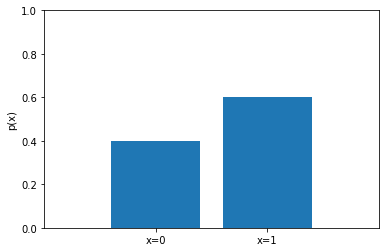

In [2]:
# 확률을 0.6으로 설정
theta = 0.6
rv = stats.bernoulli(theta)
xx =[0,1]
plt.bar(xx,rv.pmf(xx))
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],['x=0','x=1'])
plt.ylabel('p(x)')

그런데 만약 성공(x=1)이 나타날 확률을 모르면 우리는 어떻게 할것인가?

여기서 필요한 것이 베타분포이다. 베타 분포(Beta distribution)는 다른 확률 분포와 달리 자연계에 존재하는 데이터의 분포를 묘사하기 보다는 베이지안 추정의 결과를 묘사하기위한 목적으로 주로 사용된다. 베이지안 추정(Bayesian estimation)은 추정하고자 하는 모수의 값을 하나의 숫자로 나타내는 것이 아니라 분포로 묘사한다.

먼저 성공과 실패의 확률을 모를때는 성공과 실패의 비를 정한다 예를 들어 1:1 이 경우 50대 50인 균등분포를 이루게 된다.

여기서 성공과 실패가 계속 발생하면서 베타분포는 변하게 된다>

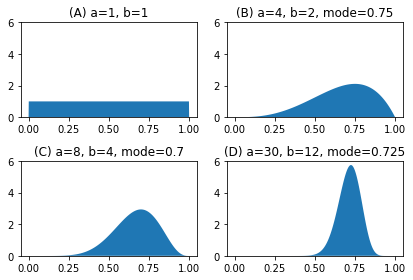

In [5]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill(xx, stats.beta(1.0001, 1.0001).pdf(xx)); plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill(xx, stats.beta(4, 2).pdf(xx)); plt.ylim(0, 6)
plt.title("(B) a=4, b=2, mode={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill(xx, stats.beta(8, 4).pdf(xx)); plt.ylim(0, 6)
plt.title("(C) a=8, b=4, mode={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill(xx, stats.beta(30, 12).pdf(xx)); plt.ylim(0, 6)
plt.title("(D) a=30, b=12, mode={0}".format((30-1)/(30+12-2)))
plt.tight_layout()

위의 그래프는 성공과 실패의 비를  1/2 라는 사전확률로 시작해 30/42이라는 사후확률로 마무리 된것이다.

위 4개의 분포를 보며 알수 있는 것은 사건이 많이 발생할수록 확률분포의 범위가 좁아진다는 것이다. 

즉 Sampling을 많이 할수록 더 정확한 확률의 확률을 구할수 있단는 것이다.

# 감마분포

감마 분포(Gamma distribution)도 베타 분포(Beta distribution)처럼 모수의 베이지안 추정에 사용된다. 다만 베타 분포가 0부터 1사이의 값을 가지는 모수를 베이지안 방법으로 추정하는데 사용되는 것과 달리 감마 분포는 0부터 무한대의 값을 가지는 양수 값을 추정하는데 사용된다.



SciPy의 stats 서브패키지에서 제공하는 gamma 클래스는 모수  b=1 로 고정되어  a  값만 설정할 수 있다.  b 를 바꾸려면  x 값 스케일과 계수를 수동으로 설정하여야 한다.

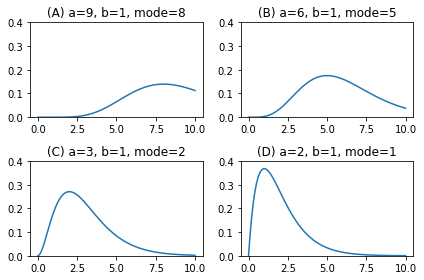

In [11]:
xx = np.linspace(0, 10, 100)
plt.subplot(221)
plt.plot(xx, stats.gamma(9).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, mode=8")
plt.subplot(222)
plt.plot(xx, stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, mode=5")
plt.subplot(223)
plt.plot(xx, stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, mode=2")
plt.subplot(224)
plt.plot(xx, stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, mode=1")
plt.tight_layout()


위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

- (A): 모수값이 8일 가능성이 가장 크다. (정확도 아주 낮음)
- (B): 모수값이 5일 가능성이 가장 크다. (정확도 낮음)
- (C): 모수값이 2일 가능성이 가장 크다. (정확도 높음)
- (D): 모수값이 1일 가능성이 가장 크다. (정확도 아주 높음)